In [1]:
indir='./results/f0_ae_train_1kg_val_1kg'
epoch=123
# indir='./results/ae_train_1kg_val_1kg_f0'
# epoch=107

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fn = f'{indir}/confusion_matrix_epoch{epoch}.csv'
conf_mat = pd.read_csv(fn,header=None)
# print(conf_mat)
conf_mat = np.array(conf_mat)
total = np.sum(conf_mat)
print(total)

# calculate the accuracy
accuracy = np.sum(np.diag(conf_mat)) / total
print(accuracy)

512.0
0.845703125


In [4]:
fn = f'{indir}/confusion_matrix_bubble_epoch{epoch}.csv'

conf_mat = pd.read_csv(fn,header=None)
print(conf_mat)
conf_mat = np.array(conf_mat)
# rows are predicted, columns are expected

         0        1        2        3        4        5        6     7   \
0   85.1852   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0   
1    0.0000  44.4444   0.0000   0.0000   3.0303   0.0000   0.0000   0.0   
2    0.0000   0.0000  94.4444   0.0000   0.0000   0.0000   0.0000  15.0   
3    0.0000   0.0000   0.0000  71.4286   9.0909   0.0000   0.0000   0.0   
4    0.0000   5.5556   0.0000   4.7619  78.7879   0.0000   0.0000   0.0   
5    0.0000   0.0000   0.0000   0.0000   0.0000  88.8889   0.0000   0.0   
6    0.0000   0.0000   0.0000   0.0000   0.0000   0.0000  96.5517   0.0   
7    0.0000   0.0000   1.8519   0.0000   0.0000   0.0000   0.0000  70.0   
8    0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0   
9    0.0000   0.0000   3.7037   0.0000   0.0000   0.0000   0.0000  15.0   
10   0.0000   0.0000   0.0000   9.5238   0.0000   0.0000   0.0000   0.0   
11   0.0000  50.0000   0.0000  14.2857   9.0909   0.0000   0.0000   0.0   
12   0.0000   0.0000   0.

In [5]:
populations = [
    'BEB', 'CDX', 'CEU+GBR', 'CHB', 'CHS', 'CLM', 'ESN', 'FIN', 'GWD', 
    'IBS', 'JPT', 'KHV', 'LWK', 'MSL', 'PEL', 'PJL', 'PUR', 'TSI', 'YRI']
labels = populations
print(labels)

['BEB', 'CDX', 'CEU+GBR', 'CHB', 'CHS', 'CLM', 'ESN', 'FIN', 'GWD', 'IBS', 'JPT', 'KHV', 'LWK', 'MSL', 'PEL', 'PJL', 'PUR', 'TSI', 'YRI']


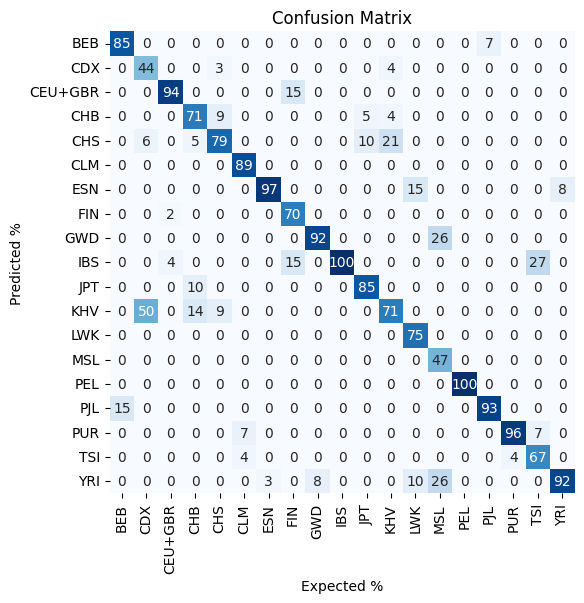

In [6]:
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', cbar=False, 
            xticklabels=labels, yticklabels=labels, fmt='.0f')
plt.title('Confusion Matrix')
plt.xlabel('Expected %')
plt.ylabel('Predicted %')
plt.show()

In [7]:
def get_power(df, degree=0):
    # df is a pandas dataframe of shape (n_classes, n_classes)
    # power: among the expected positive, how many are predicted related
    # rows are expected, columns are predicted
    expected_pos = df.iloc[degree, :].sum()
    predicted_pos = df.iloc[:, degree].sum()
    true_pos = df.iloc[degree, degree]
    predicted_unrelated = df.iloc[degree, 0].sum()
    power = 1 - (predicted_unrelated/expected_pos)
    recall = true_pos/expected_pos
    precision = true_pos/predicted_pos
    f1 = 2*precision*recall/(precision+recall)
    return power*100, recall*100, precision*100, f1*100


In [8]:
def get_F1_score(conf_mat):
    # conf_mat is a numpy array of shape (n_classes, n_classes)
    # rows are predicted, columns are expected
    # return a list of F1 scores for each class
    df = conf_mat.T # rows are expected, columns are predicted
    df = pd.DataFrame(df)
    F1_scores = []
    for i in range(df.shape[0]):
        F1_scores.append(get_power(df, i)[3])
    return F1_scores

f1 = get_F1_score(conf_mat)
[print(i,j) for i,j in zip(labels, f1)]

overall_F1 = np.mean(f1)
print(f'Overall F1 score: {overall_F1}')

BEB 88.8030819606165
CDX 58.617765333213754
CEU+GBR 90.18565308979376
CHB 75.31238434846604
CHS 71.64532662964726
CLM 94.11765328719687
ESN 87.82017872979057
FIN 81.46549441699509
GWD 84.10464142763755
IBS 81.50942411961672
JPT 87.39290513551555
KHV 58.010178948519275
LWK 85.71428571428571
MSL 64.28569489795642
PEL 100.0
PJL 89.67970401843687
PUR 91.61744718713823
TSI 76.65398618734187
YRI 76.46407447987417
Overall F1 score: 81.23157262694959
